#Importing Libraries

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

#Loading Dataset

In [19]:
df = pd.read_csv('/content/merged_file2.csv')

In [20]:
df.head()

,onset_strength,chroma_stft,chroma_cqt,chroma_cens,melspectrogram,mfcc,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,...,log_rel_pitch_F1_F2,log_rel_pitch_F1_F3,F1_frequency,F1_bandwidth,F1_amplitude_wrt_pitch,F2_frequency,F2_amplitude_wrt_pitch,F3_frequency,F3_amplitude_wrt_pitch,vocal artist
0,1.166610,0.222790,0.236665,0.188930,4.951307,-23.728514,2212.803596,2378.233273,28.160184,4241.666308,...,9.149949,19.938778,592.739624,1324.491455,1.036228,1528.459106,-3.987155,2584.722900,-13.741380,Arijit Singh
1,1.119346,0.204452,0.224101,0.188567,5.378464,-22.367577,1894.191035,2370.518595,29.645531,3948.045346,...,12.671179,19.014812,549.956848,1277.017578,0.757279,1477.498779,-5.540631,2599.384033,-15.091183,Arijit Singh
2,1.094491,0.251022,0.226141,0.181547,2.794210,-22.680693,2211.299555,2602.682457,27.774650,4750.669263,...,12.778128,19.516304,610.751221,1296.460327,-6.386609,1635.023560,-16.382030,2615.964600,-21.542931,Arijit Singh
3,1.005489,0.226060,0.211988,0.182111,5.619192,-23.894613,2241.890274,2291.395171,28.242198,4229.026168,...,9.799430,8.490372,756.456299,1205.238159,-5.809905,1716.402832,-6.918570,2707.395752,-10.454976,Arijit Singh
4,1.084786,0.254372,0.258660,0.198609,4.755458,-24.306395,1927.596019,2006.408646,28.594260,3283.039081,...,7.490228,13.162914,721.407227,1353.933960,-3.686828,1633.766602,-8.455423,2616.466309,-14.321383,Arijit Singh


In [21]:
df.columns

Index(['onset_strength', 'chroma_stft', 'chroma_cqt', 'chroma_cens',
       'melspectrogram', 'mfcc', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_contrast', 'spectral_rolloff', 'tonnetz',
       'zero_crossing_rate', 'rms', 'spectral_entropy', 'loudness',
       'alpha_ratio', 'hammarberg_index', 'spectral_slope_0_500',
       'spectral_slope_500_1500', 'pitch', 'pitch_variation',
       'amplitude_variation', 'harmonic_to_noise_ratio', 'log_rel_pitch_F1_F2',
       'log_rel_pitch_F1_F3', 'F1_frequency', 'F1_bandwidth',
       'F1_amplitude_wrt_pitch', 'F2_frequency', 'F2_amplitude_wrt_pitch',
       'F3_frequency', 'F3_amplitude_wrt_pitch', 'vocal artist'],
      dtype='object')

#Preprocessing

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   onset_strength           720 non-null    float64
 1   chroma_stft              720 non-null    float64
 2   chroma_cqt               720 non-null    float64
 3   chroma_cens              720 non-null    float64
 4   melspectrogram           720 non-null    float64
 5   mfcc                     720 non-null    float64
 6   spectral_centroid        720 non-null    float64
 7   spectral_bandwidth       720 non-null    float64
 8   spectral_contrast        720 non-null    float64
 9   spectral_rolloff         720 non-null    float64
 10  tonnetz                  720 non-null    float64
 11  zero_crossing_rate       720 non-null    float64
 12  rms                      720 non-null    float64
 13  spectral_entropy         720 non-null    float64
 14  loudness                 7

In [23]:
df.isnull().sum()

onset_strength             0
chroma_stft                0
chroma_cqt                 0
chroma_cens                0
melspectrogram             0
mfcc                       0
spectral_centroid          0
spectral_bandwidth         0
spectral_contrast          0
spectral_rolloff           0
tonnetz                    0
zero_crossing_rate         0
rms                        0
spectral_entropy           0
loudness                   0
alpha_ratio                0
hammarberg_index           0
spectral_slope_0_500       0
spectral_slope_500_1500    0
pitch                      0
pitch_variation            0
amplitude_variation        0
harmonic_to_noise_ratio    0
log_rel_pitch_F1_F2        0
log_rel_pitch_F1_F3        0
F1_frequency               0
F1_bandwidth               0
F1_amplitude_wrt_pitch     0
F2_frequency               0
F2_amplitude_wrt_pitch     0
F3_frequency               0
F3_amplitude_wrt_pitch     0
vocal artist               0
dtype: int64

#Encoding categorical variables

In [24]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
df['vocal artist_encoded'] = label_encoder.fit_transform(df['vocal artist'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   onset_strength           720 non-null    float64
 1   chroma_stft              720 non-null    float64
 2   chroma_cqt               720 non-null    float64
 3   chroma_cens              720 non-null    float64
 4   melspectrogram           720 non-null    float64
 5   mfcc                     720 non-null    float64
 6   spectral_centroid        720 non-null    float64
 7   spectral_bandwidth       720 non-null    float64
 8   spectral_contrast        720 non-null    float64
 9   spectral_rolloff         720 non-null    float64
 10  tonnetz                  720 non-null    float64
 11  zero_crossing_rate       720 non-null    float64
 12  rms                      720 non-null    float64
 13  spectral_entropy         720 non-null    float64
 14  loudness                 7

In [26]:
#data=df.copy()

#Using Feature Importance Technique

In [27]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

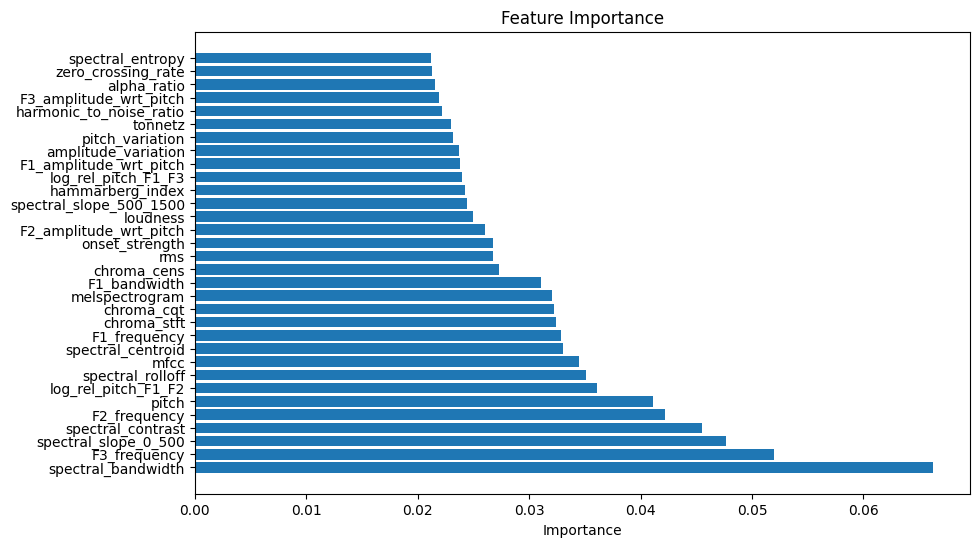

In [28]:
# Separate the features and the target variable
X = df.drop(['vocal artist', 'vocal artist_encoded'], axis=1)
y = df['vocal artist_encoded']

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns,
                                      'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')

# Show the plot
plt.show()


In [29]:
# Set the threshold for feature importance
threshold = 0.025

# Filter features based on the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Create a new DataFrame with selected features
selected_features_df = X[selected_features['Feature'].tolist()]

# Display the selected features
print(selected_features_df.head())


   spectral_bandwidth  F3_frequency  spectral_slope_0_500  spectral_contrast  \
0         2378.233273   2584.722900              0.117244          28.160184   
1         2370.518595   2599.384033              0.103508          29.645531   
2         2602.682457   2615.964600              0.104864          27.774650   
3         2291.395171   2707.395752              0.101517          28.242198   
4         2006.408646   2616.466309              0.121816          28.594260   

   F2_frequency      pitch  log_rel_pitch_F1_F2  spectral_rolloff       mfcc  \
0   1528.459106  41.950741             9.149949       4241.666308 -23.728514   
1   1477.498779  39.272026            12.671179       3948.045346 -22.367577   
2   1635.023560  40.178120            12.778128       4750.669263 -22.680693   
3   1716.402832  41.930065             9.799430       4229.026168 -23.894613   
4   1633.766602  40.725834             7.490228       3283.039081 -24.306395   

   spectral_centroid  F1_frequency  ch

In [30]:
selected_features_df = pd.concat([selected_features_df, df[['vocal artist_encoded']]], axis=1)
selected_features_df


,spectral_bandwidth,F3_frequency,spectral_slope_0_500,spectral_contrast,F2_frequency,pitch,log_rel_pitch_F1_F2,spectral_rolloff,mfcc,spectral_centroid,F1_frequency,chroma_stft,chroma_cqt,melspectrogram,F1_bandwidth,chroma_cens,rms,onset_strength,F2_amplitude_wrt_pitch,vocal artist_encoded
0,2378.233273,2584.722900,0.117244,28.160184,1528.459106,41.950741,9.149949,4241.666308,-23.728514,2212.803596,592.739624,0.222790,0.236665,4.951307,1324.491455,0.188930,0.147212,1.166610,-3.987155,0
1,2370.518595,2599.384033,0.103508,29.645531,1477.498779,39.272026,12.671179,3948.045346,-22.367577,1894.191035,549.956848,0.204452,0.224101,5.378464,1277.017578,0.188567,0.155689,1.119346,-5.540631,0
2,2602.682457,2615.964600,0.104864,27.774650,1635.023560,40.178120,12.778128,4750.669263,-22.680693,2211.299555,610.751221,0.251022,0.226141,2.794210,1296.460327,0.181547,0.107228,1.094491,-16.382030,0
3,2291.395171,2707.395752,0.101517,28.242198,1716.402832,41.930065,9.799430,4229.026168,-23.894613,2241.890274,756.456299,0.226060,0.211988,5.619192,1205.238159,0.182111,0.164970,1.005489,-6.918570,0
4,2006.408646,2616.466309,0.121816,28.594260,1633.766602,40.725834,7.490228,3283.039081,-24.306395,1927.596019,721.407227,0.254372,0.258660,4.755458,1353.933960,0.198609,0.152646,1.084786,-8.455423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2795.932842,2789.112549,0.144015,28.382473,1865.111572,44.340023,11.107574,6217.450107,-22.138569,3291.395199,800.670837,0.286523,0.299153,3.385366,1044.727173,0.211476,0.130500,1.212962,-17.151203,11
716,3090.046641,2902.582031,0.141829,28.574344,1862.925781,44.362511,5.411469,7713.682977,-23.004822,4164.932014,885.607300,0.250286,0.265325,6.764705,1006.456665,0.200150,0.176693,1.153883,-22.550623,11
717,2863.339244,2798.019043,0.148573,28.753431,1800.776123,43.111744,6.140220,6311.926411,-24.693834,3098.793597,809.728088,0.273640,0.269173,2.530101,1115.580322,0.210008,0.108717,1.312927,-19.723997,11
718,2726.563588,2946.730469,0.128272,28.708758,1908.125366,47.015907,7.003859,6412.522941,-25.148638,3455.886733,893.166809,0.234279,0.239191,1.847060,915.857300,0.197347,0.099599,1.176437,-13.467644,11


#Splitting the dataset

In [31]:
#df = selected_features_df.copy()

In [32]:
# Separate features and target
X = selected_features_df.drop(['vocal artist_encoded'], axis=1)
y = selected_features_df['vocal artist_encoded']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets with a stratified split
# Stratified sampling ensures an equal distribution of classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

# Check the class distribution in training and testing sets
print("Class distribution in training set:", {class_label: sum(y_train == class_label) for class_label in set(y_train)})
print("Class distribution in testing set:", {class_label: sum(y_test == class_label) for class_label in set(y_test)})


Class distribution in training set: {0: 54, 1: 54, 2: 54, 3: 54, 4: 54, 5: 54, 6: 54, 7: 54, 8: 54, 9: 54, 10: 54, 11: 54}
Class distribution in testing set: {0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6}


#Feature Scaling

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Modeling

##ML models

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


#Create a machine learning pipeline with hyperparameter tuning
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

results = {}

for clf_name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('classifier', clf)  # Classifier
    ])

    # Define hyperparameters for tuning
    hyperparameters = {}

    # Add hyperparameter grid for specific classifiers
    if clf_name == 'Logistic Regression':
        hyperparameters = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__max_iter': [100, 200, 300, 500],
            'classifier__multi_class': ['ovr', 'multinomial'],
            'classifier__solver': ['lbfgs', 'saga']
        }
    elif clf_name == 'KNN':
        hyperparameters = {'classifier__n_neighbors': [3, 5, 7]}
    elif clf_name == 'Decision Tree':
        hyperparameters = {'classifier__max_depth': [None, 10, 20, 30]}
    elif clf_name == 'Random Forest':
        hyperparameters = {'classifier__n_estimators': [50, 100, 200]}
    elif clf_name == 'SVM':
        hyperparameters = {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
    elif clf_name == 'XGBoost':
        hyperparameters = {'classifier__n_estimators': [50, 100, 200]}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Step 3: Train the model
    best_model.fit(X_train, y_train)

    # Step 4: Make predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Step 5: Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results[clf_name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

# Step 6: Display results
for clf_name, accuracies in results.items():
    print(f'{clf_name}: Train Accuracy - {accuracies["Train Accuracy"]:.4f}, Test Accuracy - {accuracies["Test Accuracy"]:.4f}')
    print(f'Best Parameters: {grid_search.best_params_}')


Logistic Regression: Train Accuracy - 0.7284, Test Accuracy - 0.5694
Best Parameters: {'classifier__n_estimators': 200}
KNN: Train Accuracy - 0.6898, Test Accuracy - 0.5139
Best Parameters: {'classifier__n_estimators': 200}
Decision Tree: Train Accuracy - 1.0000, Test Accuracy - 0.3750
Best Parameters: {'classifier__n_estimators': 200}
Random Forest: Train Accuracy - 1.0000, Test Accuracy - 0.5556
Best Parameters: {'classifier__n_estimators': 200}
SVM: Train Accuracy - 0.9769, Test Accuracy - 0.6250
Best Parameters: {'classifier__n_estimators': 200}
XGBoost: Train Accuracy - 1.0000, Test Accuracy - 0.5972
Best Parameters: {'classifier__n_estimators': 200}


##DEEP LEARNING MODELS

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from keras.utils import to_categorical
from keras import layers, models
import tensorflow as tf
from sklearn.pipeline import Pipeline

###ANN Model with 2 hidden layers

In [36]:
# ANN Model with 2 hidden layers
pipeline_2_layers = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=len(X.columns))),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
])
pipeline_2_layers.fit(X_train, y_train)
y_pred_2_layers = pipeline_2_layers.predict(X_test)
accuracy_2_layers = accuracy_score(y_test, y_pred_2_layers)
print(f'2 Layers Accuracy: {accuracy_2_layers:.4f}')


2 Layers Accuracy: 0.6389


###ANN Model with 4 hidden layers

In [37]:
# ANN Model with 4 hidden layers
pipeline_4_layers = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=len(X.columns))),
    ('classifier', MLPClassifier(hidden_layer_sizes=(200, 100, 50, 25), max_iter=500, random_state=42))
])
pipeline_4_layers.fit(X_train, y_train)
y_pred_4_layers = pipeline_4_layers.predict(X_test)
accuracy_4_layers = accuracy_score(y_test, y_pred_4_layers)
print(f'4 Layers Accuracy: {accuracy_4_layers:.4f}')

4 Layers Accuracy: 0.5972


###ANN Model with 6 hidden layers

In [38]:
# ANN Model with 6 hidden layers
pipeline_6_layers = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=len(X.columns))),
    ('classifier', MLPClassifier(hidden_layer_sizes=(200, 150, 100, 75, 50, 25), max_iter=500, random_state=42))
])
pipeline_6_layers.fit(X_train, y_train)
y_pred_6_layers = pipeline_6_layers.predict(X_test)
accuracy_6_layers = accuracy_score(y_test, y_pred_6_layers)
print(f'6 Layers Accuracy: {accuracy_6_layers:.4f}')

6 Layers Accuracy: 0.5556


###ANN Model with 8 hidden layers

In [39]:
# ANN Model with 8 hidden layers
pipeline_8_layers = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=len(X.columns))),
    ('classifier', MLPClassifier(hidden_layer_sizes=(300, 250, 200, 150, 100, 75, 50, 25), max_iter=500, random_state=42))
])
pipeline_8_layers.fit(X_train, y_train)
y_pred_8_layers = pipeline_8_layers.predict(X_test)
accuracy_8_layers = accuracy_score(y_test, y_pred_8_layers)
print(f'8 Layers Accuracy: {accuracy_8_layers:.4f}')

8 Layers Accuracy: 0.5556


###ANN Model with skip connections (8 hidden layers)

In [40]:
# ANN Model with skip connections (8 hidden layers)
tf.config.run_functions_eagerly(True)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_layer = tf.keras.Input(shape=(X_train.shape[1],))
x = layers.Dense(300, activation='relu')(input_layer)
skip1 = layers.Dense(250, activation='relu')(x)
x = layers.concatenate([x, skip1])
x = layers.Dense(200, activation='relu')(x)
skip2 = layers.Dense(150, activation='relu')(x)
x = layers.concatenate([x, skip2])
x = layers.Dense(100, activation='relu')(x)
skip3 = layers.Dense(75, activation='relu')(x)
x = layers.concatenate([x, skip3])
x = layers.Dense(50, activation='relu')(x)
skip4 = layers.Dense(25, activation='relu')(x)
x = layers.concatenate([x, skip4])
output_layer = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
model_skip_connections = models.Model(inputs=input_layer, outputs=output_layer)
model_skip_connections.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_skip_connections.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=64, validation_split=0.2)
y_pred_prob_skip_connections = model_skip_connections.predict(X_test_scaled)
y_pred_skip_connections = tf.argmax(y_pred_prob_skip_connections, axis=1)
y_pred_labels_skip_connections = label_encoder.inverse_transform(y_pred_skip_connections.numpy())
accuracy_skip_connections = accuracy_score(y_test, y_pred_labels_skip_connections)
print(f"Skip Connections Accuracy: {accuracy_skip_connections * 100:.2f}%")


Epoch 1/10
9/9 [==============================] - 2s 145ms/step - loss: 2.3596 - accuracy: 0.2181 - val_loss: 2.2768 - val_accuracy: 0.2692
Epoch 2/10
9/9 [==============================] - 1s 126ms/step - loss: 1.9944 - accuracy: 0.3533 - val_loss: 1.9458 - val_accuracy: 0.4231
Epoch 3/10
9/9 [==============================] - 1s 144ms/step - loss: 1.6588 - accuracy: 0.4595 - val_loss: 1.6458 - val_accuracy: 0.4538
Epoch 4/10
9/9 [==============================] - 1s 125ms/step - loss: 1.3998 - accuracy: 0.5386 - val_loss: 1.6112 - val_accuracy: 0.4923
Epoch 5/10
9/9 [==============================] - 1s 97ms/step - loss: 1.2385 - accuracy: 0.5676 - val_loss: 1.3455 - val_accuracy: 0.4769
Epoch 6/10
9/9 [==============================] - 1s 107ms/step - loss: 1.1643 - accuracy: 0.5830 - val_loss: 1.4162 - val_accuracy: 0.5231
Epoch 7/10
9/9 [==============================] - 1s 96ms/step - loss: 1.0681 - accuracy: 0.6216 - val_loss: 1.2292 - val_accuracy: 0.5769
Epoch 8/10
9/9 [======

###ANN Model with Batch Normalization (8 hidden layers)

In [41]:
# ANN Model with Batch Normalization (8 hidden layers)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_layer = tf.keras.Input(shape=(X_train.shape[1],))
x = layers.Dense(300)(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
skip1 = layers.Dense(250)(x)
skip1 = layers.BatchNormalization()(skip1)
x = layers.concatenate([x, skip1])
x = layers.Activation('relu')(x)
x = layers.Dense(200)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
skip2 = layers.Dense(150)(x)
skip2 = layers.BatchNormalization()(skip2)
x = layers.concatenate([x, skip2])
x = layers.Activation('relu')(x)
x = layers.Dense(100)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
skip3 = layers.Dense(75)(x)
skip3 = layers.BatchNormalization()(skip3)
x = layers.concatenate([x, skip3])
x = layers.Activation('relu')(x)
x = layers.Dense(50)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
skip4 = layers.Dense(25)(x)
skip4 = layers.BatchNormalization()(skip4)
x = layers.concatenate([x, skip4])
x = layers.Activation('relu')(x)
output_layer = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
model_bn = models.Model(inputs=input_layer, outputs=output_layer)
model_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train_scaled, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.2)
y_pred_prob_bn = model_bn.predict(X_test_scaled)
y_pred_bn = tf.argmax(y_pred_prob_bn, axis=1)
y_pred_labels_bn = label_encoder.inverse_transform(y_pred_bn.numpy())
accuracy_bn = accuracy_score(y_test, y_pred_labels_bn)
print(f"Batch Normalization Accuracy: {accuracy_bn * 100:.2f}%")


Epoch 1/100
9/9 [==============================] - 2s 216ms/step - loss: 2.3272 - accuracy: 0.2278 - val_loss: 2.3562 - val_accuracy: 0.2308
Epoch 2/100
9/9 [==============================] - 2s 191ms/step - loss: 1.5868 - accuracy: 0.5135 - val_loss: 2.2910 - val_accuracy: 0.2308
Epoch 3/100
9/9 [==============================] - 2s 268ms/step - loss: 1.3401 - accuracy: 0.6467 - val_loss: 2.2503 - val_accuracy: 0.3000
Epoch 4/100
9/9 [==============================] - 2s 254ms/step - loss: 1.1228 - accuracy: 0.7201 - val_loss: 2.2161 - val_accuracy: 0.3615
Epoch 5/100
9/9 [==============================] - 2s 174ms/step - loss: 0.9877 - accuracy: 0.7625 - val_loss: 2.1677 - val_accuracy: 0.3769
Epoch 6/100
9/9 [==============================] - 2s 200ms/step - loss: 0.9269 - accuracy: 0.7876 - val_loss: 2.0924 - val_accuracy: 0.4385
Epoch 7/100
9/9 [==============================] - 2s 193ms/step - loss: 0.8685 - accuracy: 0.7780 - val_loss: 2.0327 - val_accuracy: 0.4462
Epoch 8/100
9

###ANN Model with 12 hidden layers

In [42]:
# ANN Model with 12 hidden layers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_layer = tf.keras.Input(shape=(X_train.shape[1],))
x = input_layer

for i in range(1, 8):
    x = layers.Dense(300, activation='relu')(x)
    if i % 2 == 0:
        x = layers.BatchNormalization()(x)
    if i % 3 == 0:
        skip_layer = x

output_layer = layers.Dense(len(label_encoder.classes_), activation='softmax')(x)
model_12_layers = models.Model(inputs=input_layer, outputs=output_layer)
model_12_layers.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_12_layers.fit(X_train_scaled, y_train_one_hot, epochs=100, batch_size=64, validation_split=0.2)
y_pred_prob_12_layers = model_12_layers.predict(X_test_scaled)
y_pred_12_layers = tf.argmax(y_pred_prob_12_layers, axis=1)
y_pred_labels_12_layers = label_encoder.inverse_transform(y_pred_12_layers.numpy())
accuracy_12_layers = accuracy_score(y_test, y_pred_labels_12_layers)
print(f"12 Layers Accuracy: {accuracy_12_layers * 100:.2f}%")

Epoch 1/100
9/9 [==============================] - 1s 138ms/step - loss: 2.1669 - accuracy: 0.2973 - val_loss: 2.4331 - val_accuracy: 0.2538
Epoch 2/100
9/9 [==============================] - 1s 136ms/step - loss: 1.0594 - accuracy: 0.6448 - val_loss: 2.3986 - val_accuracy: 0.3154
Epoch 3/100
9/9 [==============================] - 1s 132ms/step - loss: 0.7067 - accuracy: 0.7799 - val_loss: 2.3859 - val_accuracy: 0.2615
Epoch 4/100
9/9 [==============================] - 1s 138ms/step - loss: 0.5829 - accuracy: 0.8436 - val_loss: 2.3814 - val_accuracy: 0.1769
Epoch 5/100
9/9 [==============================] - 1s 123ms/step - loss: 0.3906 - accuracy: 0.8900 - val_loss: 2.3487 - val_accuracy: 0.2000
Epoch 6/100
9/9 [==============================] - 1s 120ms/step - loss: 0.4104 - accuracy: 0.8764 - val_loss: 2.3465 - val_accuracy: 0.1538
Epoch 7/100
9/9 [==============================] - 1s 124ms/step - loss: 0.3202 - accuracy: 0.9112 - val_loss: 2.3331 - val_accuracy: 0.1615
Epoch 8/100
9

#RESULTS



*   Logistic Regression - 56.94%
*   KNN - 51.39%
*   Decision Tree - 37.50%
*   Random Forest - 55.56%
*   SVM - 62.50%
*   XGBoost - 59.72%
*   ANN models

    - 2 hidden layers - 63.89%
    - 4 hidden layers - 59.72%
    - 6 hidden layers - 55.56%
    - 8 hidden layers - 55.56%
    - 8 hidden layers with skip connections - 44.44%
    - 8 hidden layers with batch normalization - 61.11%
    - 12 hidden layers - 45.83%